In [1]:
import numpy as np
import qutip as q
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from math import factorial, comb
import scipy.linalg as lin

In [2]:
sub_t = 350*u.um #substrate thickness (Si in this case)
metal_t = 250*u.nm #Deposited metal thickness (Al)
Sc = 67*u.fF/(u.um)**2 #JJ specific capacitance
epsilon = 11.45
W_jj = 200*u.nm #junction width
phi0 = c.h/2/c.e.si
T = 30*u.mK

In [4]:
l = np.linspace(0,100)*u.mm
l[0]

<Quantity 0. mm>

In [1]:
def get_qubit_Es(Cq,Lj):
    Ec = (c.e.si**2/2/Cq).to(u.J)
    Ej = ((phi0/2/np.pi)**2/Lj).to(u.J)
    return (Ec, Ej)
    

In [87]:
def calc_freqs1(C2):
    C1 = 115*u.fF
    Cg = 0.6*u.fF

    C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
    C_mat_inv = lin.inv(C_mat)
    C_mat_inv /= u.fF
    Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
    Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
    Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


    Lj = 13*u.nH
    Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value

    nz1 = 1j/2*(Ej/2/Ec1)**(1/4)
    nz2 = 1j/2*(Ej/2/Ec2)**(1/4)
    pz1 = (2*Ec1/Ej)**(1/4)
    pz2 = (2*Ec2/Ej)**(1/4)
    
    N = 10
    I  = q.qeye(N)
    
    qc1 = q.tensor(I, q.create(N))
    qd1 = q.tensor(I, q.destroy(N))
    qc2 = q.tensor(q.create(N),I)
    qd2 = q.tensor(q.destroy(N),I)
    
    n1 = nz1*(qc1-qd1)
    n2 = nz2*(qc2-qd2)

    phi1 = pz1*(qc1+qd1)
    phi2 = pz2*(qc2+qd2)
    
    H1 = (4*Ec1*n1*n1
          +1/2*Ej1*phi1*phi1
          -1/factorial(4)*Ej1*(phi1*phi1)*(phi1*phi1))
    H2 = 4*Ec2*n2*n2+1/2*Ej2*phi2*phi2-1/factorial(4)*Ej2*(phi2*phi2)*(phi2*phi2)
    H_int = 4*Ecg/2*(n1*n2+n2*n1)
    
    H_tot = H1+H2+H_int
    h = np.array(H_tot)
    eig, vec = lin.eigh(h)
    eig  = eig**(1/2)
    
    return(eig, vec)

In [99]:
def calc_freqs(C2):
    C1 = 115*u.fF
    Cg = 0*u.fF

    C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
    C_mat_inv = lin.inv(C_mat)
    C_mat_inv /= u.fF
    Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
    Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
    Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


    Lj = 13*u.nH
    Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value

    nz1 = 1j/2*(Ej/2/Ec1)**(1/4)
    nz2 = 1j/2*(Ej/2/Ec2)**(1/4)
    pz1 = (2*Ec1/Ej)**(1/4)
    pz2 = (2*Ec2/Ej)**(1/4)
    
    N = 15
    I  = q.qeye(N)
    
    qc1 = q.tensor(I, q.create(N))
    qd1 = q.tensor(I, q.destroy(N))
    qc2 = q.tensor(q.create(N),I)
    qd2 = q.tensor(q.destroy(N),I)
    
    n1 = nz1*(qc1-qd1)
    n2 = nz2*(qc2-qd2)

    phi1 = pz1*(qc1+qd1)
    phi2 = pz2*(qc2+qd2)
    
    H1 = (4*Ec1*n1*n1
          +1/2*Ej*phi1*phi1
          -1/factorial(4)*Ej*(phi1*phi1)*(phi1*phi1))
    H2 = 4*Ec2*n2*n2+1/2*Ej*phi2*phi2-1/factorial(4)*Ej*(phi2*phi2)*(phi2*phi2)
    H_int = 4*Ecg/2*(n1*n2+n2*n1)
    
    H_tot = H1 + H2 + H_int

    eig_vals = H_tot.eigenenergies()
    eig_vecs = H_tot.eigenstates()
    
    return(eig_vals, eig_vecs, H_tot)

In [100]:
cs = np.linspace(70,140,100)*u.fF

In [101]:
eigs_c1 = []
vecs_c1 = []
H_c1 = []
for cc in cs:
    eig1, vec1, H1 = calc_freqs(cc)
    eigs_c1 += [eig1]
    vecs_c1 += [vec1]
    H_c1 += [H1]
    
eigs_c1 = np.array(eigs_c1)/np.pi/2

vecs_c1 = vecs_c1

In [102]:
vc = vecs_c1[0][1]

In [103]:
vc

array([Quantum object: dims = [[15, 15], [1, 1]], shape = (225, 1), type = ket
       Qobj data =
       [[9.99606287e-01]
        [0.00000000e+00]
        [1.59075725e-02]
        [0.00000000e+00]
        [5.46720471e-03]
        [0.00000000e+00]
        [6.71058902e-04]
        [0.00000000e+00]
        [2.08565935e-04]
        [0.00000000e+00]
        [6.06449490e-05]
        [0.00000000e+00]
        [2.41476726e-05]
        [0.00000000e+00]
        [1.44351978e-05]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [0.00000000e+00]
        [2.10477789e-02]
        [0.00000000e+00]
        [3.34950944e-04]
        [0.00000000e+00]
        [1.15117839e-04]
        [0.00000000e+00]
  

In [104]:
eigs = eigs_c1[0]-eigs_c1[0][0]
eig0 = eigs_c1[0][0]

In [105]:
H = H_c1[0]

In [106]:
H

Quantum object: dims = [[15, 15], [15, 15]], shape = (225, 225), type = oper, isherm = True
Qobj data =
[[ 28.80710681   0.          -0.74834488 ...   0.           0.
    0.        ]
 [  0.          53.61181733   0.         ...   0.           0.
    0.        ]
 [ -0.74834488   0.          77.35820838 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 417.75408301   0.
  -46.40190871]
 [  0.           0.           0.         ...   0.         448.37955068
    0.        ]
 [  0.           0.           0.         ... -46.40190871   0.
  324.98385371]]

Text(0.5, 1.0, 'C1 = 115fF, Cg = 0.6fF, Lj = 13nH')

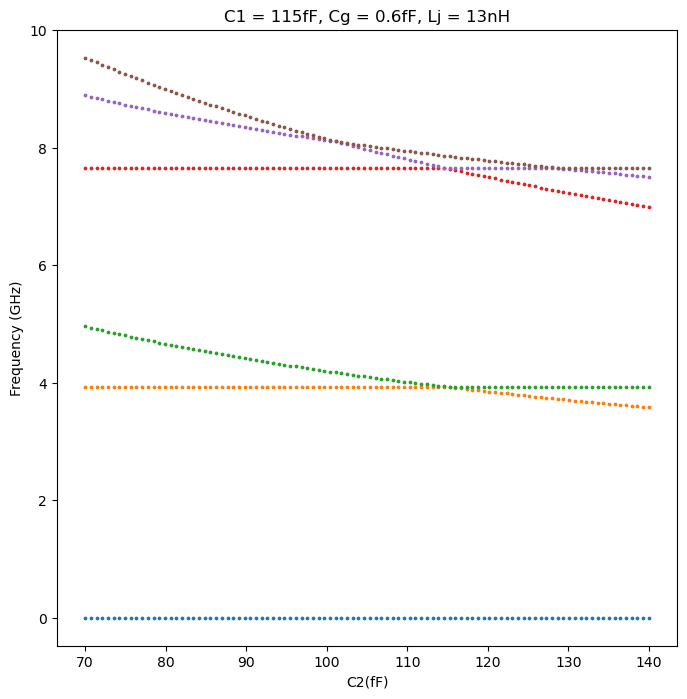

In [110]:
plt.figure(figsize = (8,8))
for i in range(6):
    plt.scatter(cs,(eigs_c1[:,i]-eigs_c1[:,0]), s = 3)
# plt.vlines(115, 5,10)
plt.xlabel('C2(fF)')
plt.ylabel('Frequency (GHz)')
plt.title('C1 = 115fF, Cg = 0.6fF, Lj = 13nH')


In [46]:
i = 2
v = q.Qobj(vecs_c1[0][i])
print(((eigs_c1[0] - eigs_c1[0][0])/np.pi/2)[:i])
N = 10
N_op2 = q.tensor(q.qeye(N), q.create(N),)* q.tensor(q.qeye(N), q.destroy(N),)
N_op2 = q.Qobj(np.array(N_op2))
print(v.dag()*N_op2*v)

N_op1 = q.tensor(q.create(N),q.qeye(N), )* q.tensor(q.destroy(N),q.qeye(N), )
N_op1 = q.Qobj(np.array(N_op1))
print(v.dag()*N_op1*v)


IndexError: tuple index out of range

In [342]:
v = np.absolute(vecs_c1[0][2])
i = np.absolute(vecs_c1[0][2]).argsort()

In [73]:
vc

Quantum object: dims = [[10, 10], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[9.99609608e-01]
 [0.00000000e+00]
 [1.58607601e-02]
 [0.00000000e+00]
 [5.44724435e-03]
 [0.00000000e+00]
 [6.60485259e-04]
 [0.00000000e+00]
 [1.84826493e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.23176112e-04]
 [0.00000000e+00]
 [2.56911957e-05]
 [0.00000000e+00]
 [1.03724953e-05]
 [0.00000000e+00]
 [1.60072580e-06]
 [0.00000000e+00]
 [8.64308872e-07]
 [2.09417572e-02]
 [0.00000000e+00]
 [3.32969552e-04]
 [0.00000000e+00]
 [1.14153651e-04]
 [0.00000000e+00]
 [1.38525786e-05]
 [0.00000000e+00]
 [3.87448940e-06]
 [0.00000000e+00]
 [0.00000000e+00]
 [3.60000165e-05]
 [0.00000000e+00]
 [1.21639133e-06]
 [0.00000000e+00]
 [4.66467483e-07]
 [0.00000000e+00]
 [7.50315503e-08]
 [0.00000000e+00]
 [4.14337222e-08]
 [7.60536669e-03]
 [0.00000000e+00]
 [1.20724149e-04]
 [0.00000000e+00]
 [4.14472899e-05]
 [0.00000000e+00]
 [5.02637795e-06]
 [0.00000000e+00]
 [1.40641928e-06]
 [0.00000000e+00]
 [0.00000000e+00

In [313]:
cs[59]

<Quantity 111.71717172 fF>

In [115]:
n = 15
ord = 40

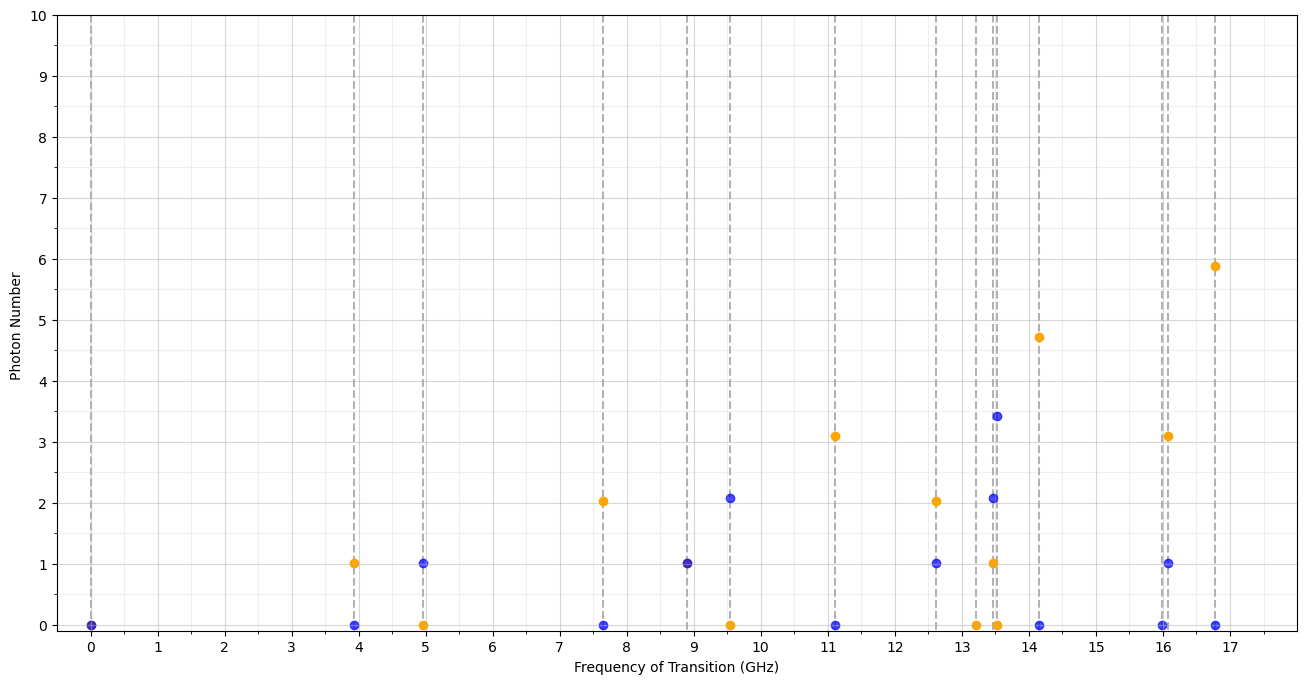

In [120]:

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 1, 1)
xmax = 18

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, xmax, 1)
minor_ticks = np.arange(0, xmax, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2, zorder = -2)
ax.grid(which='major', alpha=0.5, zorder = -2)

eig0 = 0
for i in range(n):
    v = vc[i]
    Hi = H
    eig = v.dag()*Hi*v/np.pi/2
    if i ==0:
        eig0 = np.absolute(np.array(eig))
    eig -= eig0

    # print(((eigs_c1[0] - eigs_c1[0][0])/np.pi/2)[:i])
    N = 15
    N_op2 = q.tensor(q.qeye(N), q.create(N),)* q.tensor(q.qeye(N), q.destroy(N),)#qubit 1
    
    # print(v.dag()*N_op2*v)

    N_op1 = q.tensor(q.create(N),q.qeye(N), )* q.tensor(q.destroy(N),q.qeye(N), )#qubit 2
    
    # print(v.dag()*N_op1*v)
    # plt.plot([i], np.absolute(np.array(v.dag()*N_op2*v)), color = 'orange')#qubit 1
    # plt.plot([i], np.absolute(np.array(v.dag()*N_op1*v)), color = 'blue')#qubit 2
    plt.scatter([eig], np.absolute(np.array(v.dag()*N_op2*v)), color = 'orange')#qubit 1
    plt.scatter([eig], np.absolute(np.array(v.dag()*N_op1*v)), color = 'blue', alpha = 0.7)
    plt.vlines(np.array(eig),-1,10,color = 'black',linestyles = '--', alpha = 0.3, zorder = -1)
    

plt.xlabel('Frequency of Transition (GHz)')
plt.ylabel('Photon Number ')
plt.xlim(-0.5,xmax)
plt.ylim(-0.1,10)
plt.show()
# plt.legend()


In [117]:
np.array(vc[8].dag()*N_op2*vc[8])

array([[0.00062908+0.j]])

In [118]:
np.array(vc[8].dag()*N_op1*vc[8])

array([[11.24001676+0.j]])

In [128]:
eig0[0][0]

4.57753609437245

In [129]:
(eigs_c1[0][8]-eig0[0][0])

13.204840430938122

In [319]:
N = 10
N_op1 = q.tensor(q.create(N),q.qeye(N), )* q.tensor(q.destroy(N),q.qeye(N), )
N_op1 = q.Qobj(np.array(N_op1))
v.dag()*N_op1*v

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[4.47905088]]

In [176]:
N_op2

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 7. 0. 0.]
 [0. 0. 0. ... 0. 8. 0.]
 [0. 0. 0. ... 0. 0. 9.]]

In [34]:
def calc_freqs_c(Cg):
    C1 = 115*u.fF
    C2 = 115*u.fF
#     Cg = 0.6*u.fF

    C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
    C_mat_inv = lin.inv(C_mat)
    C_mat_inv /= u.fF
    Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
    Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
    Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


    Lj = 13*u.nH
    Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value

    nz1 = 1j/2*(Ej/2/Ec1)**(1/4)
    nz2 = 1j/2*(Ej/2/Ec2)**(1/4)
    pz1 = (2*Ec1/Ej)**(1/4)
    pz2 = (2*Ec2/Ej)**(1/4)
    
    N = 20
    I  = q.qeye(N)
    
    qc1 = q.tensor(I, q.create(N))
    qd1 = q.tensor(I, q.destroy(N))
    qc2 = q.tensor(q.create(N),I)
    qd2 = q.tensor(q.destroy(N),I)
    
    n1 = nz1*(qc1-qd1)
    n2 = nz2*(qc2-qd2)

    phi1 = pz1*(qc1+qd1)
    phi2 = pz2*(qc2+qd2)
    
    H1 = (4*Ec1*n1*n1
          +1/2*Ej*phi1*phi1
          -1/factorial(4)*Ej*(phi1*phi1)*(phi1*phi1))
    H2 = 4*Ec2*n2*n2+1/2*Ej*phi2*phi2-1/factorial(4)*Ej*(phi2*phi2)*(phi2*phi2)
    H_int = 4*Ecg/2*(n1*n2+n2*n1)
    
    H_tot = H1+H2+H_int
    h = np.array(H_tot)
    eig, vec = lin.eigh(h)
    
    return(eig, vec)

In [35]:
cs = np.linspace(0,100,100)*u.fF

In [36]:
eigs = []
vecs = []
for cc in cs:
    eig, vec = calc_freqs_c(cc)
    eigs += [eig]
    vecs += [vec]
    
eigs = np.array(eigs)
vecs = np.array(vecs)

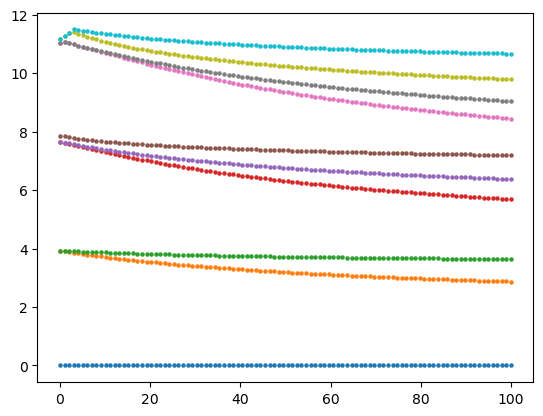

In [53]:
for i in range(10):
    plt.scatter(cs,(eigs[:,i]-eigs[:,0])/np.pi/2, s = 5, label = 'mode {}'.format(i))


In [265]:
C1 = 115*u.fF
C2 = 105*u.fF
Cg = 0*u.fF

C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
C_mat_inv = lin.inv(C_mat)
C_mat_inv /= u.fF
Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value

Lj = 13*u.nH
Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value

In [266]:
wq = (np.sqrt(8*Ej*Ec2)-Ec2)

In [267]:
wq/np.pi/2

4.12330450546393

In [240]:
e,v = calc_freqs_c(0.6*u.fF)

In [225]:
len(e)

100

In [292]:
C1 = 115*u.fF
C2 = 115*u.fF
# C2 = 80*u.fF
Cg = 0*u.fF
# Cg = .6*u.fF

C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
C_mat_inv = lin.inv(C_mat)
C_mat_inv /= u.fF
Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


Lj = 13*u.nH
Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value
Ej1 = Ej
Ej2 = Ej

# Ecg = 0*u.J
# Ecg = (c.e.si**2/2/Cg).to(u.J)

nz1 = 1j/2*(Ej1/2/Ec1)**(1/4)
nz2 = 1j/2*(Ej2/2/Ec2)**(1/4)

pz1 = (2*Ec1/Ej1)**(1/4)
pz2 = (2*Ec2/Ej2)**(1/4)


In [293]:
# print(Ej1, Ej2)
print(Ec1, Ec2)
print(nz1, nz2)
print(C_mat_inv)

1.0583194807773681 1.0583194807773681
1.2358658031455945j 1.2358658031455945j
[[0.00869565 0.        ]
 [0.         0.00869565]] 1 / fF


In [294]:
(c.e.si**2/C1/c.hbar).to(u.GHz)/2

<Quantity 1.05831948 GHz>

In [258]:
N = 10
# I1 = q.Qobj([[1,0],[0,0]])
# I2 = q.Qobj([[0,0],[0,1]])
I = q.qeye(N)
# Id1 = np.array(q.tensor(I2, I))
# Id2 = np.array(q.tensor(I1, I))

In [324]:
qc = q.create(N)
qd = q.destroy(N)

n = (qc-qd)
phi = qd+qc

n1 = np.conj(nz1)*(nz1)
n2 = np.conj(nz2)*(nz2)

p1 = np.conj(pz1)*(pz1)
p2 = np.conj(pz2)*(pz2)

In [325]:
# n1 = nz1*(qc1-qd1)
# n2 = nz2*(qc2-qd2)

# phi1 = pz1*(qc1+qd1)
# phi2 = pz2*(qc2+qd2)

In [346]:
H1 = (4*Ec1*n1*n.dag()*n
      +1/2*Ej1*p1*phi.dag()*phi
      -1/factorial(4)*Ej1*p1**2*(phi.dag()*phi)**2)
H2 = (4*Ec2*n2*n.dag()*n
      +1/2*Ej2*p2*phi.dag()*phi
      -1/factorial(4)*Ej2*p2**2*(phi.dag()*phi)**2)
H_int = 4*Ecg/2*n1*n2*q.tensor(n,n)

In [349]:
H_tot = q.tensor(H1,I)+q.tensor(I,H2)+H_int

In [350]:
h = np.array(H_tot)

In [351]:
eig, vec = lin.eigh(h)

In [352]:
eig  = eig**(1/2)

In [353]:
eig

array([ 5.03044014,  7.07133098,  7.07133098,  8.5661781 ,  8.5661781 ,
        8.64303857,  9.74333783,  9.74333783,  9.9034237 ,  9.9034237 ,
       10.42326989, 10.42326989, 10.73267576, 10.73267576, 10.9375969 ,
       10.9375969 , 11.02059374, 11.54742175, 11.54742175, 11.78030197,
       11.78030197, 11.82745632, 11.82745632, 11.95854135, 11.95854135,
       12.4156099 , 12.4156099 , 12.51873134, 12.51873134, 12.77749617,
       12.77749617, 12.78569155, 12.78569155, 12.82809168, 13.35184853,
       13.35184853, 13.37332281, 13.37332281, 13.59476492, 13.59476492,
       13.61459528, 13.61459528, 13.66929383, 13.66929383, 13.85582124,
       14.09005168, 14.09005168, 14.2204588 , 14.2204588 , 14.32045146,
       14.43616357, 14.43616357, 14.48071803, 14.48071803, 14.49329495,
       14.49329495, 14.90351441, 14.90351441, 14.95910002, 14.95910002,
       15.12152491, 15.12152491, 15.27845816, 15.27845816, 15.30978735,
       15.30978735, 15.41060013, 15.41060013, 15.62153546, 15.62

In [307]:
hh = np.array(H1*H2)
e,v = lin.eigh(hh)

In [308]:
np.sqrt(e)

array([ 12.62071642,  21.68479498,  21.68479498,  27.65110336,
        27.65110336,  32.18889083,  32.18889083,  34.77406091,
        34.77406091,  35.93532959,  35.93532959,  37.25860859,
        39.85085074,  39.85085074,  42.21452622,  42.21452622,
        46.63112662,  46.63112662,  47.50986293,  47.50986293,
        49.80825711,  49.80825711,  55.30664624,  55.30664624,
        59.74846088,  59.74846088,  60.5816256 ,  61.7437417 ,
        61.7437417 ,  68.47135292,  68.47135292,  70.52359928,
        70.52359928,  72.53259765,  72.53259765,  76.18752536,
        76.18752536,  78.7317835 ,  78.7317835 ,  80.12115848,
        80.12115848,  82.09713764,  85.58007388,  85.58007388,
        87.31041536,  87.31041536,  88.69056344,  88.69056344,
        91.65235656,  91.65235656,  92.48906233,  92.48906233,
        95.8135237 ,  99.01318581,  99.01318581, 101.6388168 ,
       101.6388168 , 102.16552366, 102.16552366, 102.31969962,
       107.66732496, 107.66732496, 109.12639344, 109.12

In [367]:
np.choose

<function numpy.choose(a, choices, out=None, mode='raise')>

In [386]:
comb(,2)

1

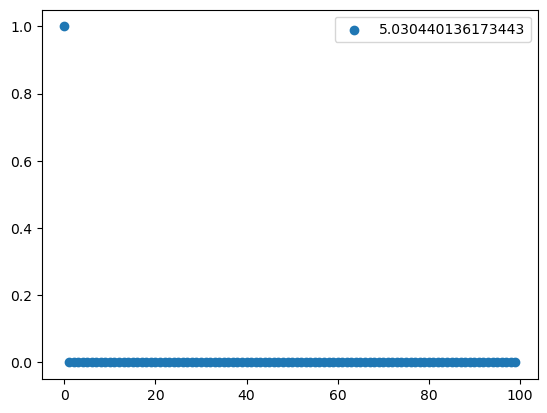

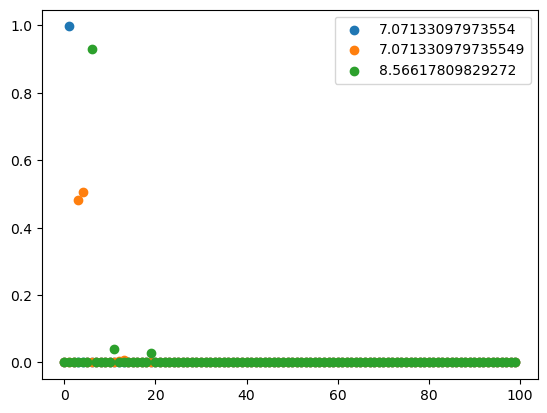

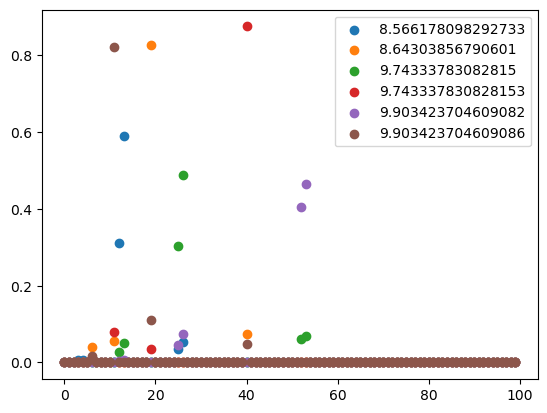

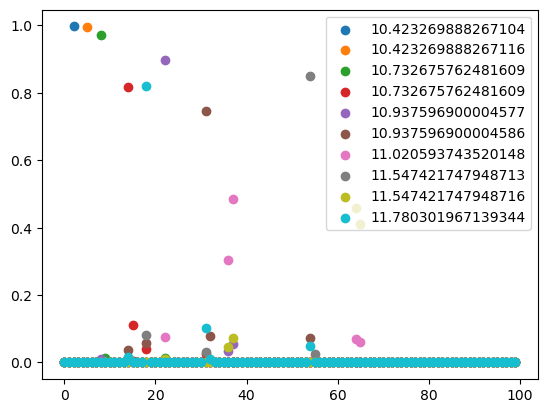

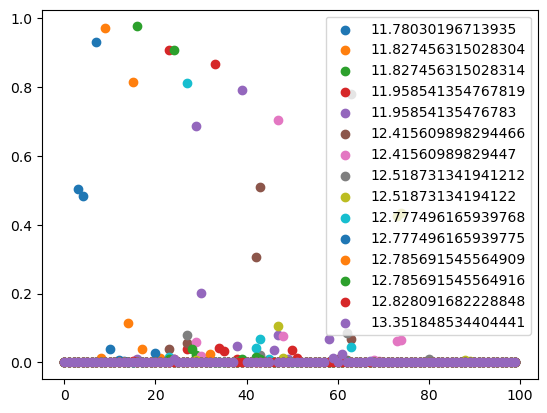

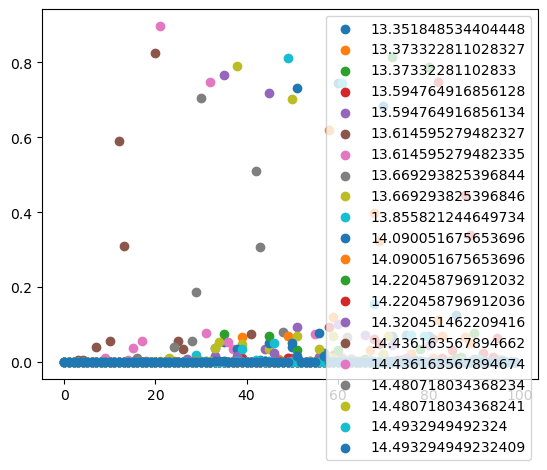

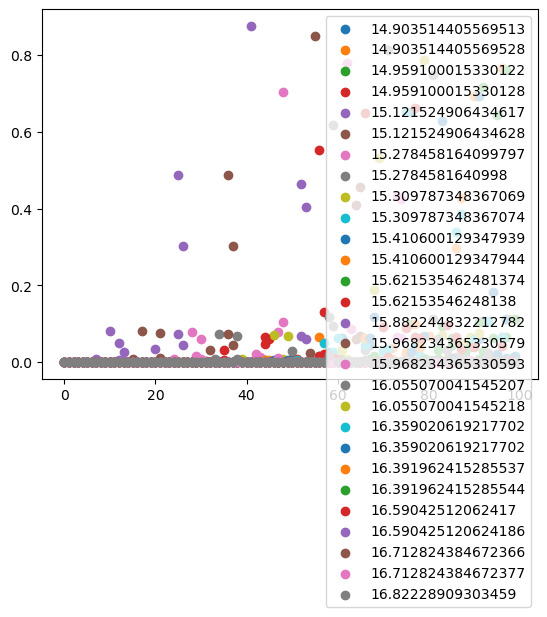

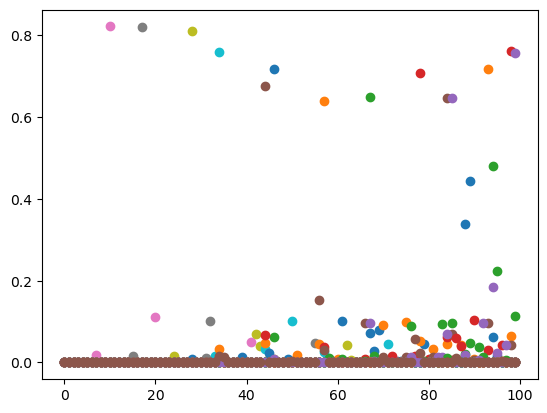

In [383]:
k = 0
ls = [0]
for i in range(10):
    k  += comb(i,2)
    ls += [k]
ls = np.array(ls)-1
    
for i in range(len(eig)):
    plt.scatter(np.arange(len(vec[0])),np.absolute(vec[i])**2, label = '{}'.format(eig[i]))
    if i in ls:
        plt.legend()
        plt.show()

In [463]:
np.sqrt(8*Ec1*Ej1)-Ec1-eig[0]*2*u.J

<Quantity -5.27935002e-26 J>

In [513]:
f1 = eig[0]*2*u.J/c.h

In [514]:
f2 = eig[1]*2*u.J/c.h

In [515]:
f1-f2

<Quantity -4.76837158e-07 1 / s>

In [134]:
I1 = q.Qobj([[1,0],[0,0]])
I2 = q.Qobj([[0,0],[0,1]])

In [135]:
q.tensor(I1, q.create(N))

Quantum object: dims = [[2, 10], [2, 10]], shape = (20, 20), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.    

In [85]:
q.tensor( I2, q.create(N))

Quantum object: dims = [[2, 5], [2, 5]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.41421356 0.         0.         0.        ]
 [0.         0.         0.         0.        

In [77]:
q.identity(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

In [78]:
H = q.tensor(q.sigmaz(), 
             q.qeye(2)) + q.tensor(q.identity(2), q.sigmaz()) + 0.05 * q.tensor(q.sigmax(), q.sigmax())